🚀 Social Media Price Predictor
📊 Project Overview
In this project, I've combined web scraping, data science, and machine learning techniques to predict product prices based on social media metrics. My goal was to understand and quantify the relationship between social media engagement and product pricing, potentially revolutionizing pricing strategies in the digital marketplace.

🛠️ Technologies I Used
Python
BeautifulSoup (for web scraping)
Pandas (for data manipulation)
Scikit-learn (for machine learning)
Matplotlib/Seaborn (for data visualization)

# 1- Web Scraping

In [1]:
## import libraries for web scraping

import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import date, timedelta

In [2]:
# Function to get data using webscrapping libraries
def scraping_data(url):
    response = requests.get(url, timeout=15)
    html = response.text
    soup = BeautifulSoup(html, "html.parser")
    
    date = soup.find("td", {"id": "date"}).text
    price = soup.find("td", {"id": "price"}).text
    likes = soup.find("td", {"id": "likes"}).text
    dislikes = soup.find("td", {"id": "dislikes"}).text
    followers = soup.find("td", {"id": "followers"}).text
    
    return [date, price, likes, dislikes, followers]






In [3]:
# function to save data into dataframe calling scrape_data
def scraping_to_dataframe(base_url, start_date, end_date):
    data_list = []
    current_date = start_date
    while current_date <= end_date:
        formatted_date = current_date.strftime("%Y-%m-%d")
        url = f"{base_url}/{formatted_date}.html"
        
        try:
            data = scraping_data(url)
            data_list.append(data)
      #      print(f"Scraped data for {formatted_date}")
        except Exception as e:
            print(f"Error scraping data for {formatted_date}: {e}")
        
        current_date += timedelta(days=1)
    
    # Creating Final dataset with data scrapped
    print(f"Scraped data Finished")
    df = pd.DataFrame(data_list, columns=["Date", "Price", "Likes", "Dislikes", "Followers"])
    return df



In [4]:
# Scrapping parameters for scrap data between 01-01-2019 and 01-12-2013
base_url = "https://admn5015-340805.uc.r.appspot.com"
start_date = date(2019, 1, 1)
end_date = date(2023, 12, 31)

dataframe = scraping_to_dataframe(base_url, start_date, end_date)

Scraped data Finished


In [5]:
#validate data scrapped
dataframe

,Date,Price,Likes,Dislikes,Followers
0,2019-01-01,$ 7488.23 CAD,9721,952,15734
1,2019-01-02,$ 7487.25 CAD,9723,954,15736
2,2019-01-03,$ 7486.27 CAD,9724,956,15738
3,2019-01-04,$ 7485.29 CAD,9725,957,15740
4,2019-01-05,$ 7484.31 CAD,9727,958,15741
...,...,...,...,...,...
1821,2023-12-27,$ 445593.99 CAD,13382,3708,19362
1822,2023-12-28,$ 445593.42 CAD,13385,3709,19365
1823,2023-12-29,$ 445592.85 CAD,13389,3711,19369
1824,2023-12-30,$ 445592.28 CAD,13392,3712,19373


In [6]:
## validate datatypes

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       1826 non-null   object
 1   Price      1826 non-null   object
 2   Likes      1826 non-null   object
 3   Dislikes   1826 non-null   object
 4   Followers  1826 non-null   object
dtypes: object(5)
memory usage: 71.5+ KB


# 2 - Feature engineering - Data Transformation

In [106]:
## According the datatypes got it, we need to apply some Feature engineering (Data Transformation) 
## for data clean process and finally get a dataset ready for the next steps

In [7]:
#Function to change datatypes for each datavalue in dataframe scrapped

import pandas as pd
from datetime import datetime

def featEng_dataframe(df):

    
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
    df['Likes'] = df['Likes'].str.replace(',', '').astype(int)
    df['Dislikes'] = df['Dislikes'].str.replace(',', '').astype(int)
    df['Followers'] = df['Followers'].str.replace(',', '').astype(int)
    df['Price'] = df['Price'].apply(lambda x: float(x.replace("$", "").replace(" CAD", "").strip()))
    
    return df

## Execution of Feature Engineering functions
clean_dataframe = featEng_dataframe(dataframe)



In [8]:
## Validate clean DataFrame

clean_dataframe

,Date,Price,Likes,Dislikes,Followers
0,2019-01-01,7488.23,9721,952,15734
1,2019-01-02,7487.25,9723,954,15736
2,2019-01-03,7486.27,9724,956,15738
3,2019-01-04,7485.29,9725,957,15740
4,2019-01-05,7484.31,9727,958,15741
...,...,...,...,...,...
1821,2023-12-27,445593.99,13382,3708,19362
1822,2023-12-28,445593.42,13385,3709,19365
1823,2023-12-29,445592.85,13389,3711,19369
1824,2023-12-30,445592.28,13392,3712,19373


In [9]:
## Validate Datatype for clean_dataframe

clean_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1826 entries, 0 to 1825
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1826 non-null   datetime64[ns]
 1   Price      1826 non-null   float64       
 2   Likes      1826 non-null   int32         
 3   Dislikes   1826 non-null   int32         
 4   Followers  1826 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(3)
memory usage: 50.1 KB


# 3- EDA - Exploraroty Data Analysis 

In [10]:
# Examine data

clean_dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1826.0,140951.497229,173205.484926,7157.27,12236.80,35106.47,268483.5075,445911.69
Likes,1826.0,11493.366375,1056.689984,9721.00,10599.50,11472.00,12334.0000,13396.00
Dislikes,1826.0,2342.162103,799.232125,952.00,1645.50,2350.50,3033.7500,3714.00
Followers,1826.0,17490.752464,1049.832204,15734.00,16596.25,17472.00,18341.2500,19377.00


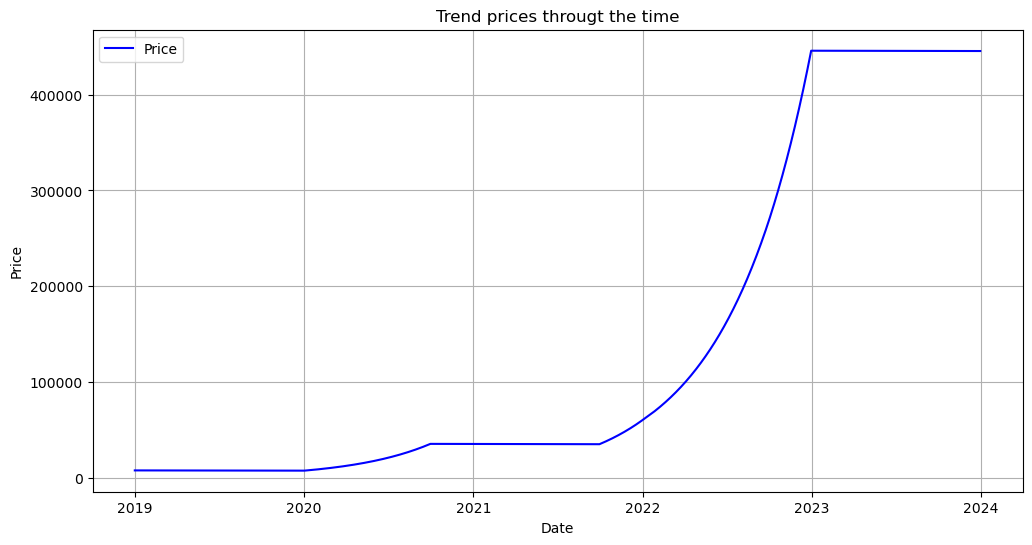

In [11]:
#Line plot for trend analysis of price according the date ranges 

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(clean_dataframe['Date'], clean_dataframe['Price'], label='Price', color='blue')
plt.title('Trend prices througt the time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

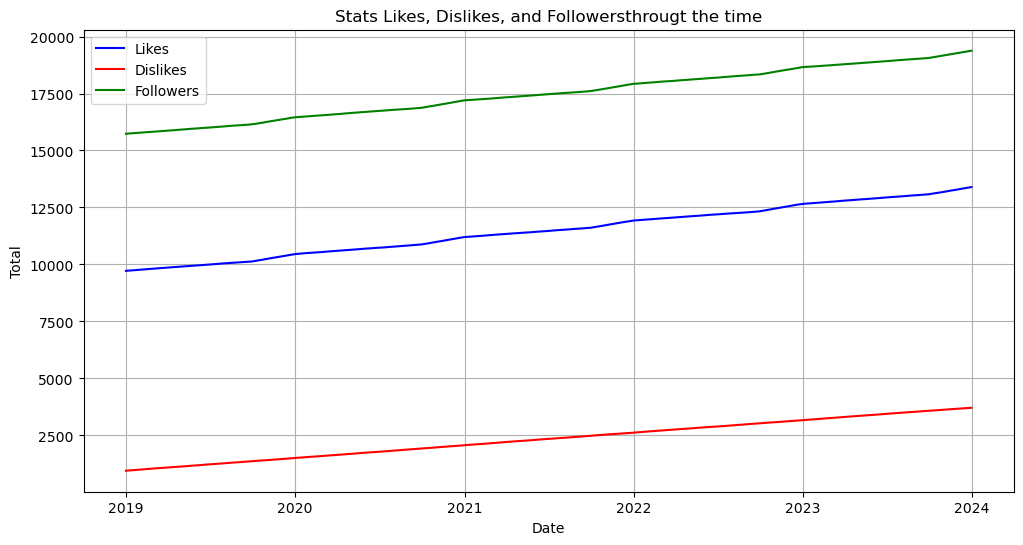

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(clean_dataframe['Date'], clean_dataframe['Likes'], label='Likes', color='blue')
plt.plot(clean_dataframe['Date'], clean_dataframe['Dislikes'], label='Dislikes', color='red')
plt.plot(clean_dataframe['Date'], clean_dataframe['Followers'], label='Followers', color='green')
plt.title('Stats Likes, Dislikes, and Followersthrougt the time')
plt.xlabel('Date')
plt.ylabel('Total')
plt.legend()
plt.grid(True)
plt.show()

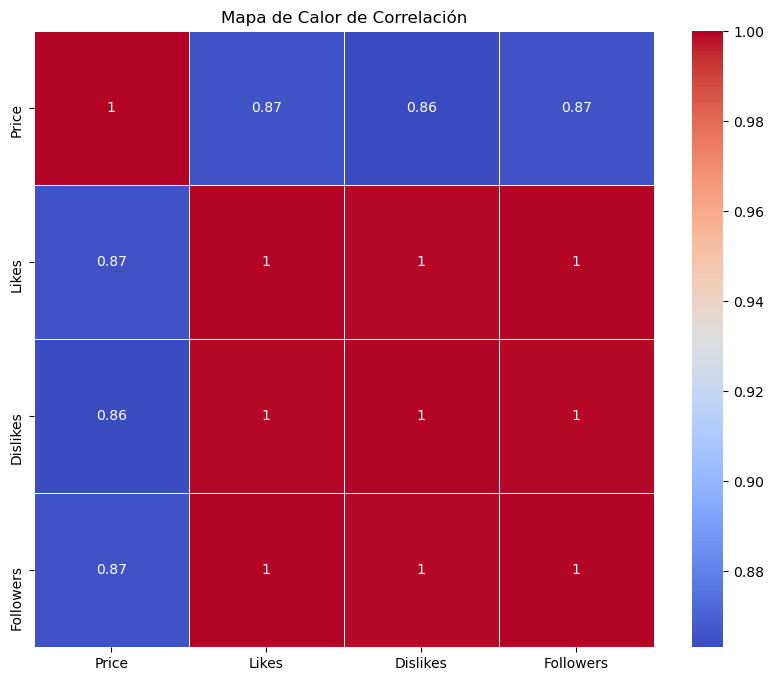

In [13]:
#Correlation matrix between variables into dataset

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = clean_dataframe[['Price', 'Likes', 'Dislikes', 'Followers']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

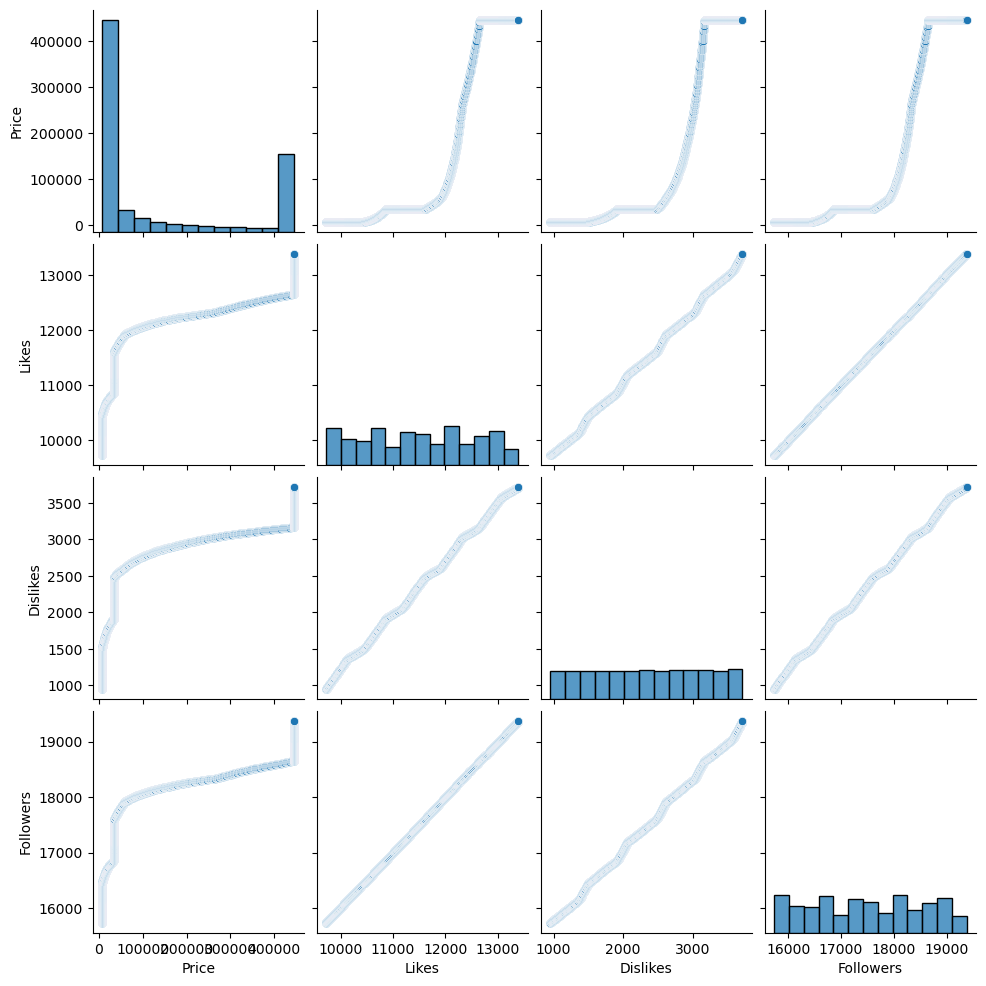

In [14]:
sns.pairplot(clean_dataframe)

C:\Users\elvis\AppData\Local\Temp\ipykernel_19156\260740511.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = clean_dataframe.corr()
C:\Users\elvis\AppData\Local\Temp\ipykernel_19156\260740511.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = clean_dataframe.corr()


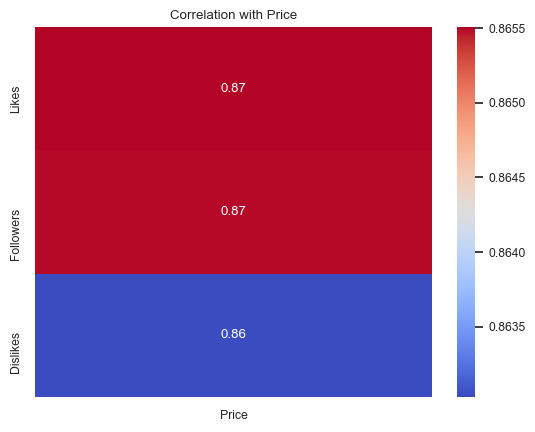

In [16]:
### This correlation it's used to identify the relevance of IV regarding DV and decide if we need to include all the IV
### or exclude one of them

correlation_matrix = clean_dataframe.corr()

corr = clean_dataframe.corr()
target_corr = corr['Price'].drop('Price')

# Sort correlation values in descending order
target_corr_sorted = target_corr.sort_values(ascending=False)

#Graph II
# Create a heatmap of the correlations with the target column
sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Price')
plt.show()

# 4 - Performance ML Model

In [17]:
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lars
from sklearn.linear_model import TheilSenRegressor
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.isotonic import IsotonicRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


In [18]:
# Create traning and testing datasets

x = clean_dataframe[['Likes', 'Dislikes', 'Followers']]
y = clean_dataframe['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [19]:
# Identify the best model

regressors = {
    "XGBRegressor": XGBRegressor(silent=True),
    "RandomForestRegressor": RandomForestRegressor(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "GaussianProcessRegressor": GaussianProcessRegressor(),
    "SVR": SVR(),
    "NuSVR": NuSVR(),
    "Ridge":Ridge(),
    "Lars": Lars(normalize=False),
    "TheilSenRegressor": TheilSenRegressor(),
    "HuberRegressor": HuberRegressor(),
    "PassiveAggressiveRegressor": PassiveAggressiveRegressor(),
    "ARDRegression": ARDRegression(),
    "BayesianRidge": BayesianRidge(),
    "ElasticNet": ElasticNet(),
    "OrthogonalMatchingPursuit": OrthogonalMatchingPursuit(normalize=False),
}


In [ ]:
df_models = pd.DataFrame(columns=['model', 'run_time', 'rmse'])

for key in regressors:

    print('*',key)

    start_time = time.time()

    regressor = regressors[key]
    model = regressor.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    scores = cross_val_score(model, 
                             x_train, 
                             y_train,
                             scoring="neg_mean_squared_error", 
                             cv=10)

    row = {'model': key,
           'run_time': format(round((time.time() - start_time)/60,2)),
           'rmse': round(np.sqrt(mean_squared_error(y_test, y_pred)))
    }

    df_models = df_models.append(row, ignore_index=True)

In [22]:
# Order model results
# According the model results, we can identify to use Random Forest Regressor

df_models.head(20).sort_values(by='rmse', ascending=True)

,model,run_time,rmse
1,RandomForestRegressor,0.07,366
2,DecisionTreeRegressor,0.0,630
0,XGBRegressor,0.01,646
6,Ridge,0.0,85686
7,Lars,0.0,85686
11,ARDRegression,0.0,85827
12,BayesianRidge,0.0,85840
13,ElasticNet,0.0,85856
9,HuberRegressor,0.0,85919
14,OrthogonalMatchingPursuit,0.0,86516


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score

In [25]:
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating RandomForest Model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
model = regressor.fit(x_train, y_train)

# Test predictions
y_pred = model.predict(x_test)

# Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
#accuracy = accuracy_score(y_test, y_pred)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
    
    


print(f"MAE: {mae:.6f}")
print(f'Mean Squared Error (MSE): {mse:.6f}')
print(f"RMSE: {rmse:.6f}")
print(f'R-squared (R2): {r2:.6f}')
#print(f'Exactitud del modelo: {accuracy}')

MAE: 129.483500
Mean Squared Error (MSE): 124429.499362
RMSE: 352.745658
R-squared (R2): 0.999996


#### According the result of MSE and R2

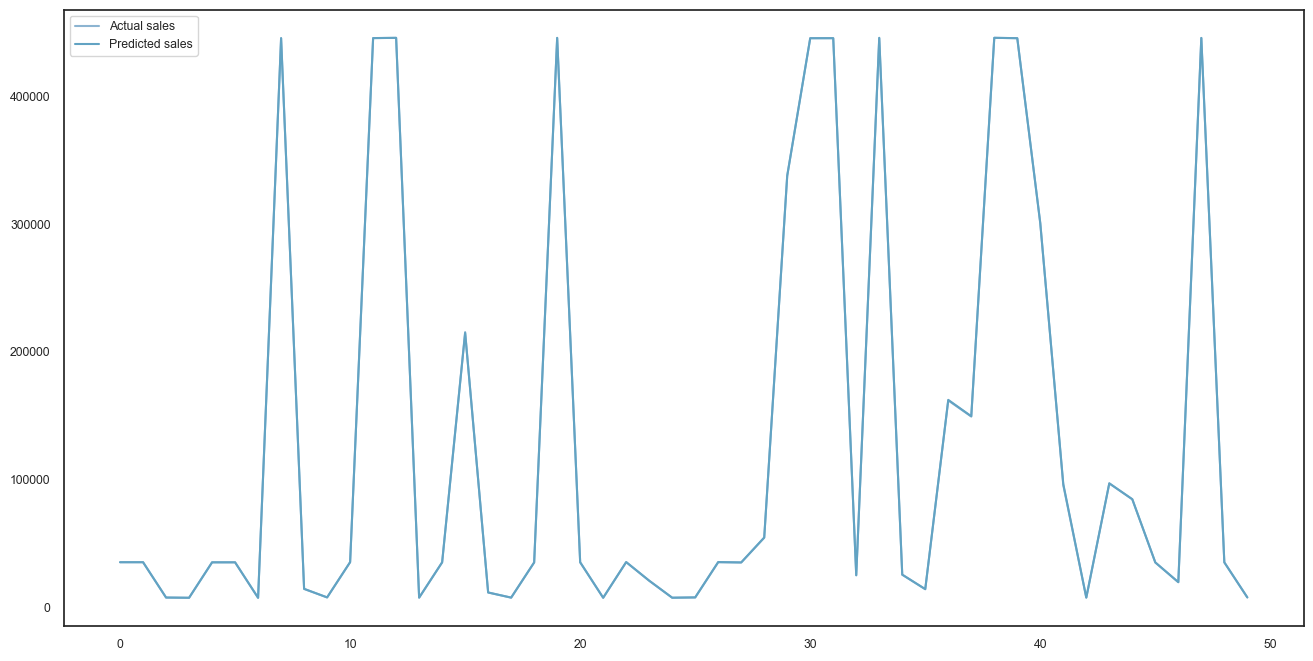

In [26]:
test = pd.DataFrame({'Predicted sales':y_pred, 'Actual sales':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.plot(test[:50])
plt.legend(['Actual sales','Predicted sales'])

# 5- Prediction for 2024-01-01

In [27]:
import pandas as pd

# Create a dataframe to predict price for 01-01-2024
date_to_predict = pd.to_datetime('2024-01-01')

# Calculate averages_for the Original DataSet
#to predict value price for 01-01-2024, i calculate average for Dislikes, Followers, Likes using original dataset, 
# to get better predict result, avoiding use random values into parameters ML model

input_data = pd.DataFrame({'Date': [date_to_predict],
                           'Dislikes': [clean_dataframe['Dislikes'].mean()],
                           'Followers': [clean_dataframe['Followers'].mean()],
                           'Likes': [clean_dataframe['Likes'].mean()]})

# Parse float values to int
input_data['Dislikes'] = input_data['Dislikes'].astype(int)
input_data['Followers'] = input_data['Followers'].astype(int)
input_data['Likes'] = input_data['Likes'].astype(int)

# Price Prediction for 2024-01-01
predicted_price = model.predict(input_data[['Likes', 'Dislikes','Followers']])
print(f'Price Prediction for 2024-01-01: {predicted_price[0]}')


Price Prediction for 2024-01-01: 34934.087400000004
